In [24]:
# setup e test librerie
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Obiettivo: classificare i funghi in velenosi o commestibili

Parlare della struttura e delle variabili contenute (magari menzionare che ho scelto questo invece che l'original e perche ha 3 valori continui). 

Nominare anche le cose spiegate nella descrizione e tutto. Si prende solo il 30% dei dati perche ci sono 60mila campioni totali

PCA?

In [25]:
from os import path
from urllib.request import urlretrieve

dataset_url = "https://archive.ics.uci.edu/static/public/848/data.csv"
if not path.exists("mushrooms.csv"):
    urlretrieve(dataset_url, "mushrooms.csv")

# mushrooms = pd.read_csv("mushrooms.csv").sample(frac=0.3, random_state=42)
mushrooms = pd.read_csv("mushrooms.csv")

mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Clean up -46MB and use proper types

In [26]:
mushrooms.rename(columns={"class": "is-edible"}, inplace=True)

mushrooms["cap-shape"] = mushrooms["cap-shape"].astype("category")
mushrooms["cap-surface"] = mushrooms["cap-surface"].astype("category")
mushrooms["cap-color"] = mushrooms["cap-color"].astype("category")
mushrooms["gill-attachment"] = mushrooms["gill-attachment"].astype("category")
mushrooms["gill-spacing"] = mushrooms["gill-spacing"].astype("category")
mushrooms["gill-color"] = mushrooms["gill-color"].astype("category")
mushrooms["stem-root"] = mushrooms["stem-root"].astype("category")
mushrooms["stem-surface"] = mushrooms["stem-surface"].astype("category")
mushrooms["stem-color"] = mushrooms["stem-color"].astype("category")
mushrooms["veil-type"] = mushrooms["veil-type"].astype("category")
mushrooms["veil-color"] = mushrooms["veil-color"].astype("category")
mushrooms["has-ring"] = mushrooms["has-ring"].astype("category")
mushrooms["ring-type"] = mushrooms["ring-type"].astype("category")
mushrooms["spore-print-color"] = mushrooms["spore-print-color"].astype("category")
mushrooms["habitat"] = mushrooms["habitat"].astype("category")
mushrooms["season"] = mushrooms["season"].astype("category")

mushrooms["is-edible"] = mushrooms["is-edible"].map({"p": False, "e": True})
mushrooms["does-bruise-or-bleed"] = mushrooms["does-bruise-or-bleed"].map({"t": True, "f": False})

mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   is-edible             61069 non-null  bool    
 1   cap-diameter          61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           46949 non-null  category
 4   cap-color             61069 non-null  category
 5   does-bruise-or-bleed  61069 non-null  bool    
 6   gill-attachment       51185 non-null  category
 7   gill-spacing          36006 non-null  category
 8   gill-color            61069 non-null  category
 9   stem-height           61069 non-null  float64 
 10  stem-width            61069 non-null  float64 
 11  stem-root             9531 non-null   category
 12  stem-surface          22945 non-null  category
 13  stem-color            61069 non-null  category
 14  veil-type             3177 non-null   category
 15  ve

Use numbers as values for categories

In [27]:
def get_map_for_categorical_column(df, column):
    map = {}
    categories = df[column].cat.categories
    for i in range(len(categories)):
        map[categories[i]] = i
    return map

mushrooms["cap-shape"] = mushrooms["cap-shape"].map(get_map_for_categorical_column(mushrooms, "cap-shape"))
mushrooms["cap-surface"] = mushrooms["cap-surface"].map(get_map_for_categorical_column(mushrooms, "cap-surface"))
mushrooms["cap-color"] = mushrooms["cap-color"].map(get_map_for_categorical_column(mushrooms, "cap-color"))
mushrooms["gill-attachment"] = mushrooms["gill-attachment"].map(get_map_for_categorical_column(mushrooms, "gill-attachment"))
mushrooms["gill-spacing"] = mushrooms["gill-spacing"].map(get_map_for_categorical_column(mushrooms, "gill-spacing"))
mushrooms["gill-color"] = mushrooms["gill-color"].map(get_map_for_categorical_column(mushrooms, "gill-color"))
mushrooms["stem-root"] = mushrooms["stem-root"].map(get_map_for_categorical_column(mushrooms, "stem-root"))
mushrooms["stem-surface"] = mushrooms["stem-surface"].map(get_map_for_categorical_column(mushrooms, "stem-surface"))
mushrooms["stem-color"] = mushrooms["stem-color"].map(get_map_for_categorical_column(mushrooms, "stem-color"))
mushrooms["veil-type"] = mushrooms["veil-type"].map(get_map_for_categorical_column(mushrooms, "veil-type"))
mushrooms["veil-color"] = mushrooms["veil-color"].map(get_map_for_categorical_column(mushrooms, "veil-color"))
mushrooms["has-ring"] = mushrooms["has-ring"].map(get_map_for_categorical_column(mushrooms, "has-ring"))
mushrooms["ring-type"] = mushrooms["ring-type"].map(get_map_for_categorical_column(mushrooms, "ring-type"))
mushrooms["spore-print-color"] = mushrooms["spore-print-color"].map(get_map_for_categorical_column(mushrooms, "spore-print-color"))
mushrooms["habitat"] = mushrooms["habitat"].map(get_map_for_categorical_column(mushrooms, "habitat"))
mushrooms["season"] = mushrooms["season"].map(get_map_for_categorical_column(mushrooms, "season"))

vediam

In [28]:
mushrooms.head()

,is-edible,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,False,15.26,6,2,6,False,2,NaN,10,16.95,...,4,7,11,0,4,1,2,NaN,0,3
1,False,16.60,6,2,6,False,2,NaN,10,17.99,...,4,7,11,0,4,1,2,NaN,0,2
2,False,14.07,6,2,6,False,2,NaN,10,17.80,...,4,7,11,0,4,1,2,NaN,0,3
3,False,14.17,2,3,1,False,2,NaN,10,15.77,...,4,7,11,0,4,1,5,NaN,0,3
4,False,14.64,6,3,6,False,2,NaN,10,16.53,...,4,7,11,0,4,1,5,NaN,0,3


Prima di fare describe si codificano le variabile categoriche

In [29]:
mushrooms.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Analisi esplorativa

In [30]:
mushrooms["is-edible"].value_counts()

is-edible
False    33888
True     27181
Name: count, dtype: int64

<Axes: ylabel='count'>

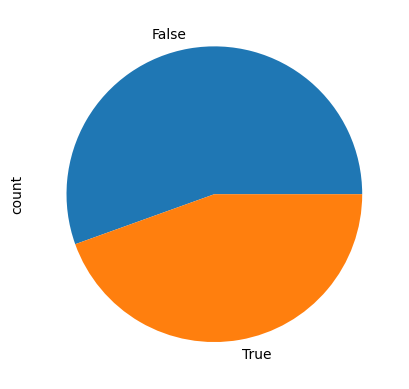

In [31]:
mushrooms["is-edible"].value_counts().plot.pie()

<Axes: ylabel='Frequency'>

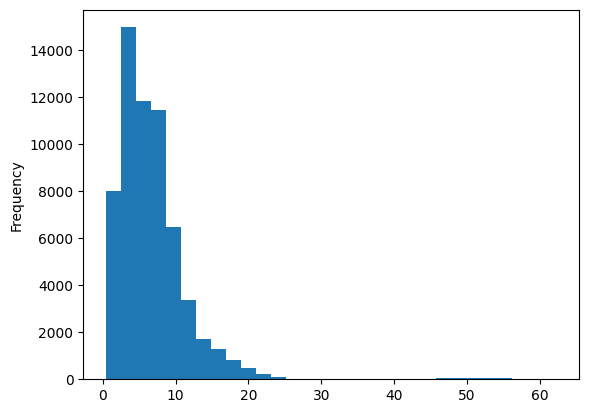

In [32]:
mushrooms["cap-diameter"].plot.hist(bins=30)

<Axes: xlabel='stem-height', ylabel='stem-width'>

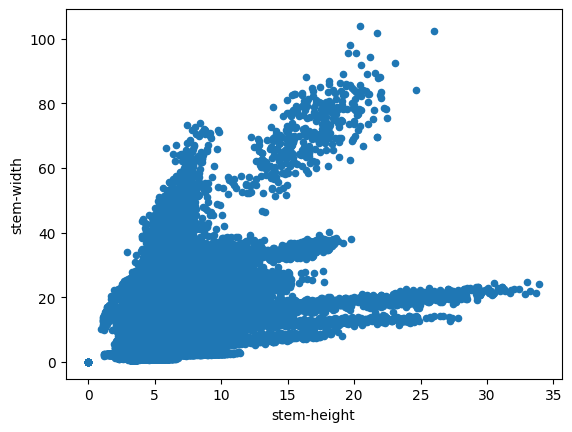

In [33]:
mushrooms.plot.scatter("stem-height", "stem-width")

Controlliamo quanti valori NaN ci sono

In [34]:
def check_na_percentages(df):
    return df.isna().sum() / df.shape[0] * 100

In [35]:
check_na_percentages(mushrooms)

is-edible                0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

Estraiamo le colonne che hanno piu' dell'80% di valori nulli nel dataset

In [36]:
columns_to_drop = []
for i in range(mushrooms.shape[1]):
    if mushrooms.iloc[:, i].isna().sum() / mushrooms.shape[0] > 0.80:
        columns_to_drop.append(mushrooms.columns[i])

print(columns_to_drop)

['stem-root', 'veil-type', 'veil-color', 'spore-print-color']


Delete all rows that have NaN values in all of those columns

In [37]:
mushrooms.dropna(subset=columns_to_drop, how='all', inplace=True)

Check again if there a lot of NaN values

In [38]:
check_na_percentages(mushrooms)

is-edible                0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.076923
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         23.076923
gill-spacing            51.923077
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               48.076923
stem-surface            61.538462
stem-color               0.000000
veil-type               82.692308
veil-color              59.615385
has-ring                 0.000000
ring-type                7.692308
spore-print-color       65.384615
habitat                  0.000000
season                   0.000000
dtype: float64

We have cleaned up a lot. we now delete the veil-type feature

In [39]:
mushrooms.drop(columns="veil-type", inplace=True)

In [40]:
check_na_percentages(mushrooms)

is-edible                0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.076923
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         23.076923
gill-spacing            51.923077
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               48.076923
stem-surface            61.538462
stem-color               0.000000
veil-color              59.615385
has-ring                 0.000000
ring-type                7.692308
spore-print-color       65.384615
habitat                  0.000000
season                   0.000000
dtype: float64

In [41]:
class_color_map = {True: "blue", False: "red"}
class_colors = mushrooms["is-edible"].map(class_color_map)

<Axes: xlabel='stem-height', ylabel='stem-width'>

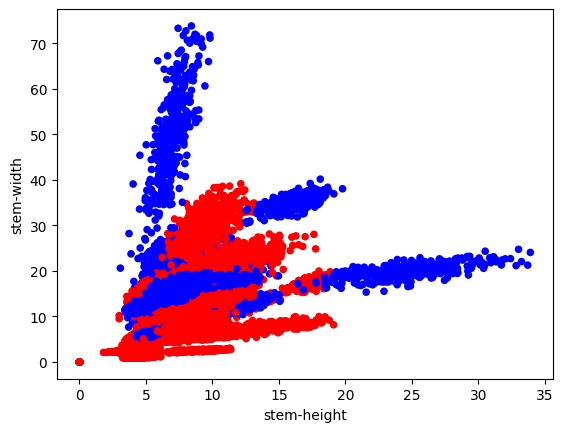

In [42]:
mushrooms.plot.scatter("stem-height", "stem-width", c=class_colors)

Fill na values

In [43]:
categories = mushrooms.select_dtypes("category").columns
for category in categories:
    mushrooms[category] = mushrooms[category].fillna(mushrooms[category].mode()[0])

check_na_percentages(mushrooms)

is-edible               0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-root               0.0
stem-surface            0.0
stem-color              0.0
veil-color              0.0
has-ring                0.0
ring-type               0.0
spore-print-color       0.0
habitat                 0.0
season                  0.0
dtype: float64

In [44]:
mushrooms.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 18356 entries, 0 to 58244
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   is-edible             18356 non-null  bool    
 1   cap-diameter          18356 non-null  float64 
 2   cap-shape             18356 non-null  category
 3   cap-surface           18356 non-null  category
 4   cap-color             18356 non-null  category
 5   does-bruise-or-bleed  18356 non-null  bool    
 6   gill-attachment       18356 non-null  category
 7   gill-spacing          18356 non-null  category
 8   gill-color            18356 non-null  category
 9   stem-height           18356 non-null  float64 
 10  stem-width            18356 non-null  float64 
 11  stem-root             18356 non-null  category
 12  stem-surface          18356 non-null  category
 13  stem-color            18356 non-null  category
 14  veil-color            18356 non-null  category
 15  has-rin

In [45]:
mushrooms.to_csv("mushrooms_cleaned.csv", index=False)